## Introduction

In this mini project, you will explore and analyze the Business Sales dataset. The dataset shows the sales of a company in different shops. Each row shows how many items of a specific product were sold on some date in some shop. The focus is on number of products sold and revenues.

The guideline is only there to give you some ideas. You don't have to follow or complete all of them. The important thing is to create a coherent analysis with meaningful comments. However, we expect that you are able to do the first 4 sections. Section 5 and 6 have more advanced questions and you may choose to do them according to your current level.

Data fields

    date - date in format yyyy-mm-dd
    date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
    shop_id - unique identifier of a shop
    shop_name - name of shop
    item_id - unique identifier of a product
    item_price - current price of the item (in Russian RUB)
    item_cnt_day - number of products sold on that date in that shop
    item_name - name of item
    item_category_id - unique identifier of item category
    item_category_name - name of item category


Shop name: The first word in shop_name is the name of a city in Russia

Item category name: Contains the general category and sub category, separated by -

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('sales_eng.csv')

In [3]:
sales

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
0,2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",2589,DEPECHE MODE Exciter,279.0,1.0,55.0,Music - CD of local production
1,2013-01-01,0.0,14.0,"Kazan Shopping center ""ParkHaus"" II",1249,ADELE 21,299.0,1.0,55.0,Music - CD of local production
2,2013-01-01,0.0,19.0,"Kursk Shopping center ""Pushkinsky""",2703,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",599.0,1.0,30.0,PC Games - Standard Edition
3,2013-01-01,0.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",3556,Forza Motorsport 4 [Xbox 360],2199.0,1.0,23.0,Games - XBOX 360
4,2013-01-01,0.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",10106,REMEMBER ALL (2012),399.0,1.0,40.0,Cinema - DVD
...,...,...,...,...,...,...,...,...,...,...
1382251,NaN,NaN,NaN,NaN,14972,Manga Surviving Youth,NaN,NaN,47.0,"Books - Comics, manga"
1382252,NaN,NaN,NaN,NaN,8545,Артбук The Art Of Bubble,NaN,NaN,42.0,"Books - Artbook, encyclopedia"
1382253,NaN,NaN,NaN,NaN,8549,Artbook Game World Rise Of The Tomb Raider,NaN,NaN,42.0,"Books - Artbook, encyclopedia"
1382254,NaN,NaN,NaN,NaN,8551,Artbook Game World Total War,NaN,NaN,42.0,"Books - Artbook, encyclopedia"


1- Initial inspection


2- Data cleaning:
    - Convert the date column to Datetime object (optional: you can choose to set it as index)
    - Inspect and handle missing values
    - Correct/remove outliers (too high item_price/item_cnt_day, negative values)


3- Create new information (only do the ones you think is needed for your analysis):
    - Revenues (items sold * item price)
    - City name
    - Product general category


4- Explore the data from different angles:
    - Plot the total amount of items sold by day. Which time of the year company makes more sales?
    - Plot the total amount sold by day of the week. Were more sales being made during the weekends?
    - Plot the top (20-30) shops by amount sold (or revenues). Which cities are they usually located?
    - Plot the top products by amount sold (or revenues). Plot the top general categories / sub-categories.
    - Bin the item_price into categories (range of your choice) and plot them.
    

5- If you want more brain burner challenges, try focusing on items through these in-depth questions
    - Which were the best selling item for each month by amounts sold / revenue?
    - How many items haven't made a sale in the last 6 months?
    - A manager wants to know which items have been selling consistently well. She defines that an item has a good  month if it accumulates more than 100000 RUB in revenues. Show 10 items that have the most good months and their average monthly revenues.
    - Sometimes an item is sold at a higher or lower than its usual price. A manager wants to know if they make more sales (in total and on average) when they increase or decrease the product price. An item is deemed overpriced (underpriced) when it's sold at 10% higher (lower) than the item's average price, otherwise it's priced normally. 
    

6- Alternatively, you can focus on the shop
    - Plot the daily revenues of the top 5 shops (in terms of total revenues).
    - Show the top 10 shops that sell the widest range of products (hint: nunique). Plot a double bar chart showing the number of unique product and total revenues (hint: use .agg()).
    - What is the correlation between yesterday revenues and today revenues? For easy version, do it on the global  scale. For a very hard version, group the data by shop and then by date (sum revenues), then create a column     that shows the previous day's revenue.

1- Initial inspection of dataset

In [4]:
sales.info() # Inspect the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382256 entries, 0 to 1382255
Data columns (total 10 columns):
date                  1381893 non-null object
date_block_num        1381893 non-null float64
shop_id               1381893 non-null float64
shop_name             1381893 non-null object
item_id               1382256 non-null int64
item_name             1382256 non-null object
item_price            1381835 non-null float64
item_cnt_day          1381893 non-null float64
item_category_id      1381887 non-null float64
item_category_name    1381887 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 105.5+ MB


In [5]:
sales.describe() # Summary statistics for the Data

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,1.381893e+06,1.381893e+06,1.382256e+06,1.381835e+06,1.381893e+06,1.381887e+06
mean,1.417271e+01,2.091522e+01,9.547165e+03,9.000180e+02,1.204432e+00,3.475014e+01
std,9.383326e+00,8.982203e+00,6.136746e+03,1.806819e+03,2.734540e+00,1.282271e+01
min,0.000000e+00,0.000000e+00,1.800000e+01,-1.000000e+00,-9.000000e+00,0.000000e+00
25%,6.000000e+00,1.500000e+01,4.245000e+03,2.490000e+02,1.000000e+00,2.500000e+01
50%,1.300000e+01,2.500000e+01,7.901000e+03,3.990000e+02,1.000000e+00,3.700000e+01
75%,2.200000e+01,2.800000e+01,1.442900e+04,9.490000e+02,1.000000e+00,4.000000e+01
max,3.300000e+01,5.900000e+01,2.216700e+04,5.920000e+04,2.169000e+03,7.900000e+01


In [6]:
sales.describe(include = 'all') # descriptive statistics for all the columns

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
count,1381893,1.381893e+06,1.381893e+06,1381893,1.382256e+06,1382256,1.381835e+06,1.381893e+06,1.381887e+06,1381887
unique,1034,NaN,NaN,58,NaN,15425,NaN,NaN,NaN,70
top,2013-12-28,NaN,NaN,"Moscow Shopping center ""Семеновский""",NaN,Playstation Store replenishment of wallet: Pay...,NaN,NaN,NaN,Cinema - DVD
freq,4274,NaN,NaN,197433,NaN,5515,NaN,NaN,NaN,307125
mean,NaN,1.417271e+01,2.091522e+01,NaN,9.547165e+03,NaN,9.000180e+02,1.204432e+00,3.475014e+01,NaN
std,NaN,9.383326e+00,8.982203e+00,NaN,6.136746e+03,NaN,1.806819e+03,2.734540e+00,1.282271e+01,NaN
min,NaN,0.000000e+00,0.000000e+00,NaN,1.800000e+01,NaN,-1.000000e+00,-9.000000e+00,0.000000e+00,NaN
25%,NaN,6.000000e+00,1.500000e+01,NaN,4.245000e+03,NaN,2.490000e+02,1.000000e+00,2.500000e+01,NaN
50%,NaN,1.300000e+01,2.500000e+01,NaN,7.901000e+03,NaN,3.990000e+02,1.000000e+00,3.700000e+01,NaN
75%,NaN,2.200000e+01,2.800000e+01,NaN,1.442900e+04,NaN,9.490000e+02,1.000000e+00,4.000000e+01,NaN


In [7]:
sales.shape # Inspect the number of rows and cloumns

(1382256, 10)

In [8]:
sales.dtypes # Check the data type

date                   object
date_block_num        float64
shop_id               float64
shop_name              object
item_id                 int64
item_name              object
item_price            float64
item_cnt_day          float64
item_category_id      float64
item_category_name     object
dtype: object

In [9]:
sales.count() # Returns the number of non-null values in each DataFrame column

date                  1381893
date_block_num        1381893
shop_id               1381893
shop_name             1381893
item_id               1382256
item_name             1382256
item_price            1381835
item_cnt_day          1381893
item_category_id      1381887
item_category_name    1381887
dtype: int64

In [10]:
len(sales['shop_id'].unique()) # Finding the exact amount of shop using the unique function

59

In [11]:
sales.nunique() # check the unique elements in each column

date                   1034
date_block_num           34
shop_id                  58
shop_name                58
item_id               15443
item_name             15425
item_price            12356
item_cnt_day            156
item_category_id         70
item_category_name       70
dtype: int64

In [12]:
sales.head() # check the first 5 rows of the dataset

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
0,2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",2589,DEPECHE MODE Exciter,279.0,1.0,55.0,Music - CD of local production
1,2013-01-01,0.0,14.0,"Kazan Shopping center ""ParkHaus"" II",1249,ADELE 21,299.0,1.0,55.0,Music - CD of local production
2,2013-01-01,0.0,19.0,"Kursk Shopping center ""Pushkinsky""",2703,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",599.0,1.0,30.0,PC Games - Standard Edition
3,2013-01-01,0.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",3556,Forza Motorsport 4 [Xbox 360],2199.0,1.0,23.0,Games - XBOX 360
4,2013-01-01,0.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",10106,REMEMBER ALL (2012),399.0,1.0,40.0,Cinema - DVD


In [13]:
sales.tail(4) # check the last 4 rows of the dataset

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
1382252,NaN,NaN,NaN,NaN,8545,Артбук The Art Of Bubble,NaN,NaN,42.0,"Books - Artbook, encyclopedia"
1382253,NaN,NaN,NaN,NaN,8549,Artbook Game World Rise Of The Tomb Raider,NaN,NaN,42.0,"Books - Artbook, encyclopedia"
1382254,NaN,NaN,NaN,NaN,8551,Artbook Game World Total War,NaN,NaN,42.0,"Books - Artbook, encyclopedia"
1382255,NaN,NaN,NaN,NaN,13096,Windows payment card: 750 rubles [Digital vers...,NaN,NaN,36.0,Payment Cards - Windows (Digital)


2- Data cleaning:

a- Convert the date column to Datetime object (optional: you can choose to set it as index)

b- Inspect and handle missing values

c- Correct/remove outliers (too high item_price/item_cnt_day, negative values)

a- Convert the date column to Datetime object (optional: you can choose to set it as index)

In [14]:
# To declare the datetime input format clearly
sales.date = pd.to_datetime(sales.date, format='%Y/%m/%d', errors='coerce')
sales.date

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
1382251          NaT
1382252          NaT
1382253          NaT
1382254          NaT
1382255          NaT
Name: date, Length: 1382256, dtype: datetime64[ns]

b- Inspect and handle missing values

In [15]:
sales[sales.date.isnull()] # Check for missing data

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
1381893,NaT,NaN,NaN,NaN,13805,ЛЕВША (BD),NaN,NaN,37.0,Cinema - Blu-Ray
1381894,NaT,NaN,NaN,NaN,14648,THE MISSION OF THE INCOMPLETE BORDER OF GODS (...,NaN,NaN,37.0,Cinema - Blu-Ray
1381895,NaT,NaN,NaN,NaN,19775,TRANSFORMERS (4BD),NaN,NaN,37.0,Cinema - Blu-Ray
1381896,NaT,NaN,NaN,NaN,1253,ADELE 25 LP,NaN,NaN,58.0,Music - Vinyl
1381897,NaT,NaN,NaN,NaN,1679,BILLY`S BAND Paris Seasons LP,NaN,NaN,58.0,Music - Vinyl
...,...,...,...,...,...,...,...,...,...,...
1382251,NaT,NaN,NaN,NaN,14972,Manga Surviving Youth,NaN,NaN,47.0,"Books - Comics, manga"
1382252,NaT,NaN,NaN,NaN,8545,Артбук The Art Of Bubble,NaN,NaN,42.0,"Books - Artbook, encyclopedia"
1382253,NaT,NaN,NaN,NaN,8549,Artbook Game World Rise Of The Tomb Raider,NaN,NaN,42.0,"Books - Artbook, encyclopedia"
1382254,NaT,NaN,NaN,NaN,8551,Artbook Game World Total War,NaN,NaN,42.0,"Books - Artbook, encyclopedia"


In [16]:
sales[sales.isnull().any(axis=1)] # select rows with missing data in any column

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
1084,2013-01-02,0.0,29.0,"Moscow Shopping center ""New Century"" (Novokosino)",3876,"Hitman Absolution: Professional Edition [PC, R...",799.0,1.0,NaN,NaN
7956,2013-01-04,0.0,54.0,"Khimki Shopping center ""Mega""",19904,TOURIST (region),149.0,1.0,NaN,NaN
10405,2013-01-05,0.0,54.0,"Khimki Shopping center ""Mega""",15038,"Methodical materials ""1C: TRADE MANAGEMENT 8. ...",390.0,1.0,NaN,NaN
10697,2013-01-05,0.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",6616,"Sleeping Dogs [PS3, Russian version]",2599.0,1.0,NaN,NaN
11785,2013-01-05,0.0,25.0,"Moscow Shopping center ""Atrium""",15106,Trackback Micro Track Survivor,999.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1382251,NaT,NaN,NaN,NaN,14972,Manga Surviving Youth,NaN,NaN,47.0,"Books - Comics, manga"
1382252,NaT,NaN,NaN,NaN,8545,Артбук The Art Of Bubble,NaN,NaN,42.0,"Books - Artbook, encyclopedia"
1382253,NaT,NaN,NaN,NaN,8549,Artbook Game World Rise Of The Tomb Raider,NaN,NaN,42.0,"Books - Artbook, encyclopedia"
1382254,NaT,NaN,NaN,NaN,8551,Artbook Game World Total War,NaN,NaN,42.0,"Books - Artbook, encyclopedia"


In [17]:
sales[sales.isnull().all(axis=1)] # check for rows with missing data in all columns

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name


In [18]:
sales = sales.dropna(subset=['date']) # Drop missing data with subset column 

In [19]:
# check the amount of missing value
sales.isnull().sum()

date                    0
date_block_num          0
shop_id                 0
shop_name               0
item_id                 0
item_name               0
item_price             58
item_cnt_day            0
item_category_id      369
item_category_name    369
dtype: int64

c- Correct/remove outliers for item_price

In [20]:
sales[sales.item_price.isnull()] # check null values for item price

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
22386,2013-01-11,0.0,31.0,"Moscow Shopping center ""Семеновский""",1956,"Black Horns PSP Slim Set ""CRYSTAL"" 3 in 1 (pl....",NaN,1.0,4.0,Accessories - PSP
24044,2013-01-11,0.0,31.0,"Moscow Shopping center ""Семеновский""",2822,"Dirt Showdown [PC, English version]",NaN,1.0,30.0,PC Games - Standard Edition
242549,2013-05-17,4.0,2.0,"Adygea Shopping center ""Mega""",15060,"Sword and Magic. Heroes 6 [PC, Jewel, Russian ...",NaN,1.0,30.0,PC Games - Standard Edition
243256,2013-05-17,4.0,57.0,"Yakutsk Ordzhonikidze, 56",6013,RAMMSTEIN Live From Berlin DVD (Кир.),NaN,1.0,59.0,Music - Musical video
264824,2013-06-01,5.0,7.0,"Voronezh Shopping center ""Maksimir""",3186,"Elder Scrolls V: Skyrim [PC, Jewel, Russian ve...",NaN,1.0,30.0,PC Games - Standard Edition
379483,2013-08-11,7.0,25.0,"Moscow Shopping center ""Atrium""",3183,"Elder Scrolls V: Skyrim Legendary Edition [PC,...",NaN,1.0,30.0,PC Games - Standard Edition
390819,2013-08-18,7.0,42.0,"St.Petersburg Shopping center ""Nevsky Center""",1921,Bestseller. Behind Enemy Lines 2: Assault. Ful...,NaN,1.0,30.0,PC Games - Standard Edition
394372,2013-08-21,7.0,29.0,"Moscow Shopping center ""New Century"" (Novokosino)",5682,PSP E1008: адаптер ARTPLAYS 100-240V,NaN,1.0,4.0,Accessories - PSP
420764,2013-09-05,8.0,46.0,"Sergiev Posad Shopping center ""7YA""",4810,Medal of Honor: Warfighter. Limited Edition [P...,NaN,1.0,19.0,Games - PS3
451923,2013-09-25,8.0,25.0,"Moscow Shopping center ""Atrium""",15102,microrobot scarab,NaN,1.0,62.0,"Gifts - Gadgets, robots, sports"


In [21]:
def fill_func(target,category):
    sales.loc[:,[target]] = sales.groupby([category])[target].ffill()
    sales.loc[:,[target]] = sales.groupby([category])[target].bfill()
    
fill_func('item_category_id','item_id')
fill_func('item_category_name','item_id')
fill_func('item_price','item_id')

sales.isnull().sum()

/Users/ibrahimmansaray/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


date                   0
date_block_num         0
shop_id                0
shop_name              0
item_id                0
item_name              0
item_price            11
item_cnt_day           0
item_category_id      59
item_category_name    59
dtype: int64

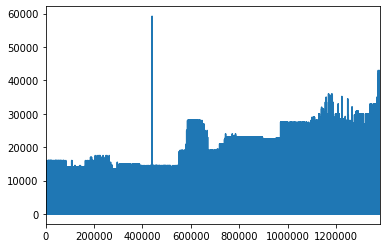

In [22]:
# detection of outlier in item_price by visualization
sales.item_price.plot(kind='line')

In [23]:
sales.loc[(sales['item_price'] > 50000)]

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
439598,2013-09-17,8.0,12.0,Online shop Emergency,11365,Shipping (EMS),59200.0,1.0,9.0,Delivery of goods


In [24]:
sales.item_price = np.where((sales.item_price > 50000), sales.item_price/100, sales.item_price)

/Users/ibrahimmansaray/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


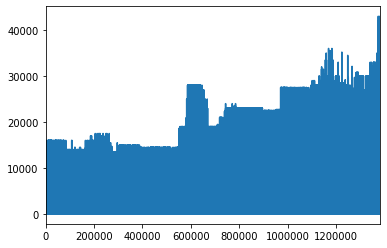

In [25]:
sales.item_price.plot(kind='line')

c- Correct/remove outliers for item_cnt_day

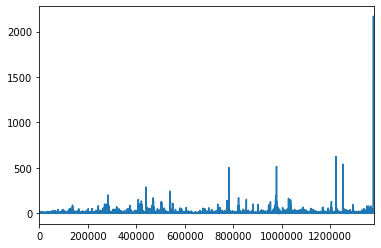

In [26]:
sales.item_cnt_day.plot(kind='line')

In [27]:
sales.loc[(sales['item_cnt_day'] > 300)]

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
781535,2014-04-22,15.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",8057,iTunes 1500 руб.,1200.000000,502.0,32.0,"Payment cards (Movies, Music, Games)"
783318,2014-04-23,15.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",8057,iTunes 1500 руб.,1200.000000,401.0,32.0,"Payment cards (Movies, Music, Games)"
978448,2014-10-02,21.0,12.0,Online shop Emergency,9242,"Ticket ""Igromir 2014"" (for one day (separately...",1500.000000,512.0,8.0,Tickets (figure)
1223421,2015-04-14,27.0,12.0,Online shop Emergency,3731,"Grand Theft Auto V [PC, Russian subtitles]",1904.548077,624.0,30.0,PC Games - Standard Edition
1252018,2015-05-19,28.0,12.0,Online shop Emergency,10209,"Witcher 3: Wild Hunt [PC, Russian version]",1499.000000,480.0,28.0,PC Games - Additional Edition
1252738,2015-05-19,28.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),155.192950,539.0,9.0,Delivery of goods
1252844,2015-05-19,28.0,12.0,Online shop Emergency,11370,Delivery (in Moscow),171.661808,343.0,9.0,Delivery of goods
1378666,2015-10-28,33.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),0.908714,2169.0,9.0,Delivery of goods


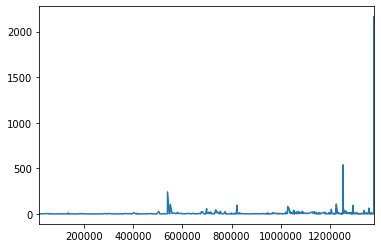

In [28]:
sales.loc[(sales.item_id.isin([11373])) & (sales.shop_id.isin([12]))].item_cnt_day.plot(kind='line')

In [29]:
sales.loc[(sales.item_id.isin([11373])) & (sales.shop_id.isin([12]))]

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name
19355,2013-01-08,0.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),1000.000000,1.0,9.0,Delivery of goods
57216,2013-01-31,0.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),97.800000,5.0,9.0,Delivery of goods
58667,2013-02-01,1.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),229.000000,1.0,9.0,Delivery of goods
64565,2013-02-04,1.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),130.000000,1.0,9.0,Delivery of goods
134760,2013-03-11,2.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),323.000000,2.0,9.0,Delivery of goods
...,...,...,...,...,...,...,...,...,...,...
1375087,2015-10-23,33.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),394.666667,3.0,9.0,Delivery of goods
1377591,2015-10-26,33.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),485.000000,3.0,9.0,Delivery of goods
1378514,2015-10-27,33.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),394.000000,1.0,9.0,Delivery of goods
1378666,2015-10-28,33.0,12.0,Online shop Emergency,11373,Delivery to the point of issue (Boxberry),0.908714,2169.0,9.0,Delivery of goods


In [30]:
sales = sales.drop([1378666], axis=0) # drop the row with abnormal values for item_price & item_cnt_day

3- Create new information (only do the ones you think is needed for your analysis):
    - Revenues (items sold * item price)
    - City name
    - Product general category

In [31]:
# adding a feature to the data analysis
sales['revenues'] = sales['item_cnt_day'] * sales['item_price']

In [32]:
# create city_name column
sales['city_name'] = sales.shop_name.str.extract(r'(^\S+)\s')

In [33]:
# create product general category column
sales['product_cat_name'] = sales.item_category_name.str.extract(r'(^.+)-')

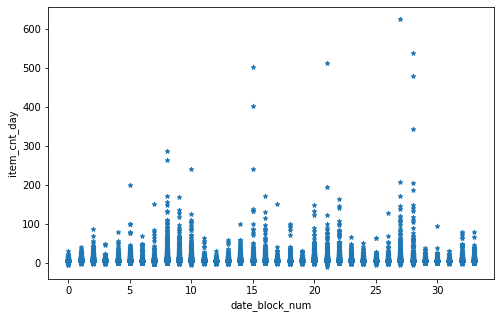

In [34]:
# plot date_block_num by item count day
sales.plot(kind='scatter', x='date_block_num', y='item_cnt_day', figsize=(8,5), marker='*')

4- Explore the data from different angles:
    - Plot the total amount of items sold by day. Which time of the year company makes more sales?
    - Plot the total amount sold by day of the week. Were more sales being made during the weekends?
    - Plot the top (20-30) shops by amount sold (or revenues). Which cities are they usually located?
    - Plot the top products by amount sold (or revenues). Plot the top general categories / sub-categories.
    - Bin the item_price into categories (range of your choice) and plot them.

- create some fuction for data analysis

In [35]:
# Monday = 0, Tuesday = 1...
sales['year'] = sales['date'].dt.year # Adding a column for year
sales['month'] = sales['date'].dt.month # Adding a column for month
sales['day'] = sales['date'].dt.day # Adding a column for day
sales['weekday'] = sales['date'].dt.weekday_name # Adding a column for weekday

In [36]:
sales

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name,revenues,city_name,product_cat_name,year,month,day,weekday
0,2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",2589,DEPECHE MODE Exciter,279.0,1.0,55.0,Music - CD of local production,279.0,Krasnoyarsk,Music,2013,1,1,Tuesday
1,2013-01-01,0.0,14.0,"Kazan Shopping center ""ParkHaus"" II",1249,ADELE 21,299.0,1.0,55.0,Music - CD of local production,299.0,Kazan,Music,2013,1,1,Tuesday
2,2013-01-01,0.0,19.0,"Kursk Shopping center ""Pushkinsky""",2703,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",599.0,1.0,30.0,PC Games - Standard Edition,599.0,Kursk,PC Games,2013,1,1,Tuesday
3,2013-01-01,0.0,27.0,"Moscow Shopping center ""MEGA Belaya Dacha II""",3556,Forza Motorsport 4 [Xbox 360],2199.0,1.0,23.0,Games - XBOX 360,2199.0,Moscow,Games,2013,1,1,Tuesday
4,2013-01-01,0.0,28.0,"Moscow Shopping center ""MEGA Teply Stan"" II",10106,REMEMBER ALL (2012),399.0,1.0,40.0,Cinema - DVD,399.0,Moscow,Cinema,2013,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381888,2015-10-31,33.0,21.0,"Moscow Shopping center ""Afi Mall""",3609,GORE MARTIN MG,349.0,1.0,55.0,Music - CD of local production,349.0,Moscow,Music,2015,10,31,Saturday
1381889,2015-10-31,33.0,15.0,"Kaluga Shopping center ""XXI Century""",7003,"Thief [PC, Jewel, Russian version]",199.0,1.0,30.0,PC Games - Standard Edition,199.0,Kaluga,PC Games,2015,10,31,Saturday
1381890,2015-10-31,33.0,3.0,"Balashikha Shopping center ""October-Kinomir""",19001,SOFIA BEAUTIFUL: THE AMULET'S COMPLETE,249.0,1.0,40.0,Cinema - DVD,249.0,Balashikha,Cinema,2015,10,31,Saturday
1381891,2015-10-31,33.0,31.0,"Moscow Shopping center ""Семеновский""",11760,GOLDEN TELNET (rem),249.0,1.0,40.0,Cinema - DVD,249.0,Moscow,Cinema,2015,10,31,Saturday


In [37]:
plt.rcParams['figure.figsize'] = (15, 6)

In [38]:
# revenues trend of sales by month of the year
plotsales = sales.groupby(['year','month'])['revenues'].sum()
plotsales = pd.DataFrame(plotsales)
plotsales.reset_index(inplace=True)
(plotsales, ['year','month'], object);

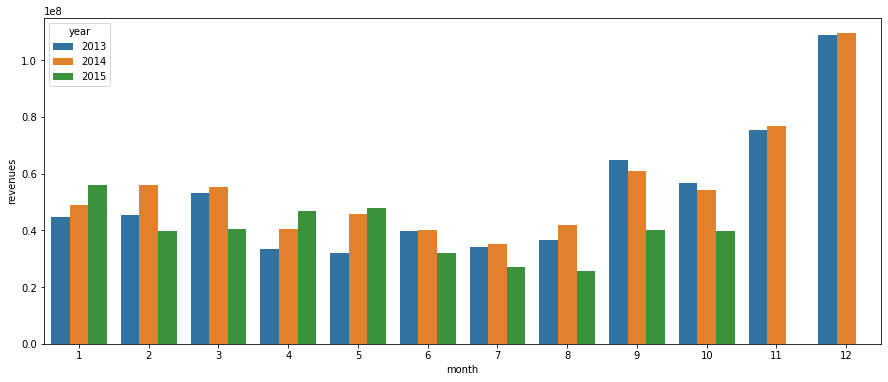

In [39]:
sns.barplot(x='month', y='revenues', hue='year', data=plotsales)

In [40]:
sales['shop_item'] = sales['shop_id'].map(str) + '_'+ sales['item_id'].map(str)

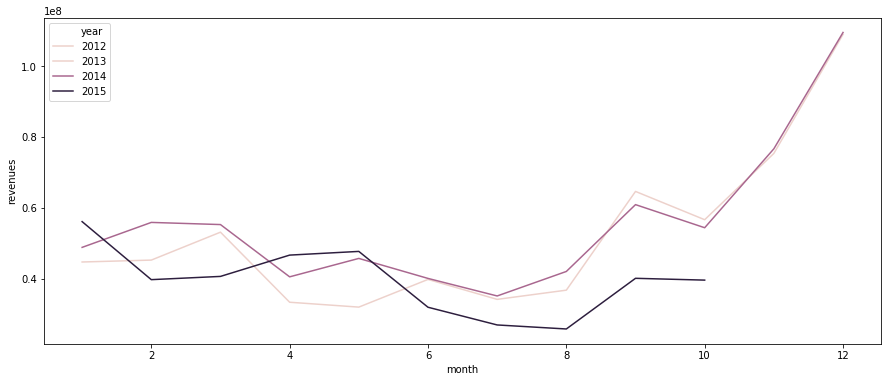

In [41]:
plotsales = pd.DataFrame(plotsales)
plotsales.reset_index(inplace=True)
plotsales = sns.lineplot(data=plotsales, x='month', hue='year', y='revenues')

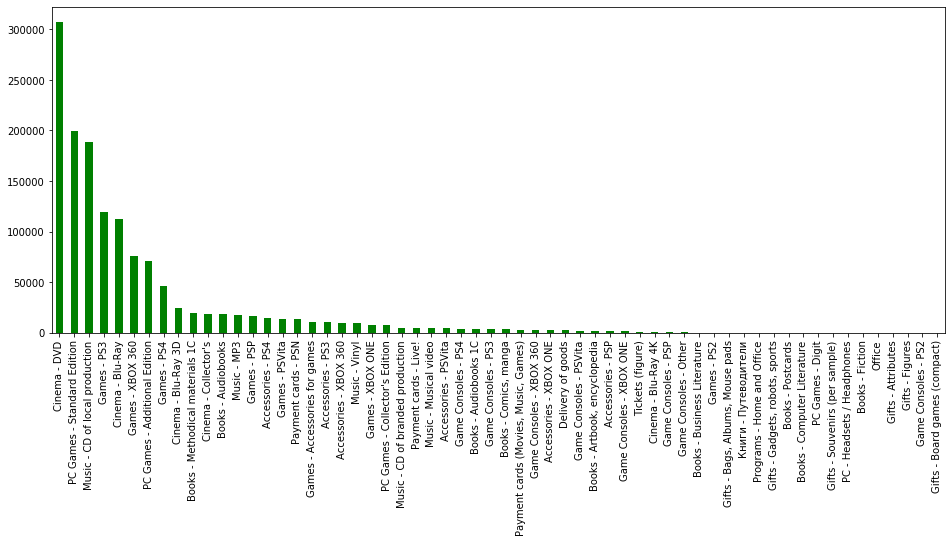

In [42]:
# plot the sales by product category
sales_category = sales.item_category_name.value_counts().plot(kind='bar', figsize=(16,6), color='g')
sales_category

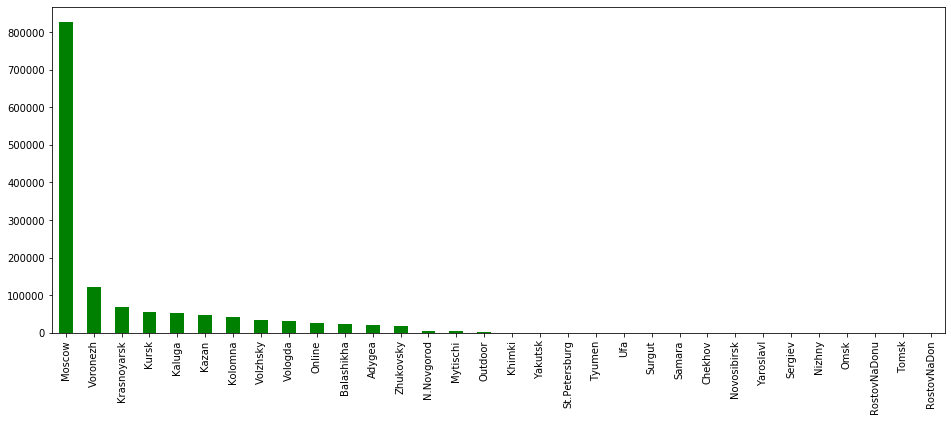

In [43]:
# plot the sales by city_name
sales_category = sales.city_name.value_counts().plot(kind='bar', figsize=(16,6), color='g')
sales_category

Text(0.5, 1.0, 'revenues vs city_name')

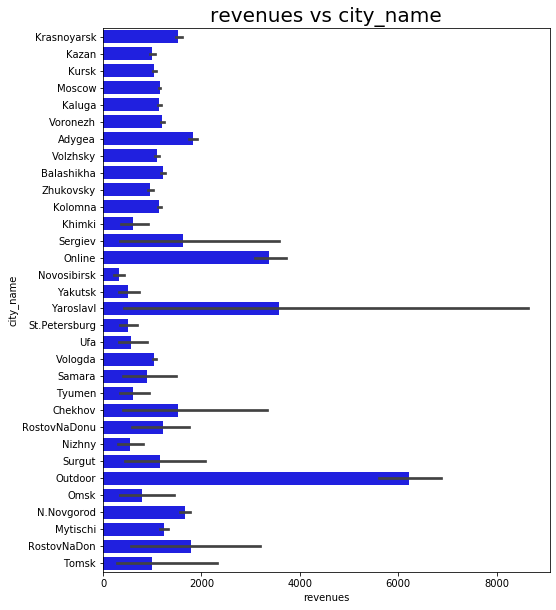

In [44]:
# sales of revenues by city_name
plt.figure(figsize = (8,10))
sns.barplot(x="revenues", y="city_name", color='blue', data=sales)
plt.title('revenues vs city_name', size=20)

Text(0.5, 1.0, 'revenues vs product_category_name')

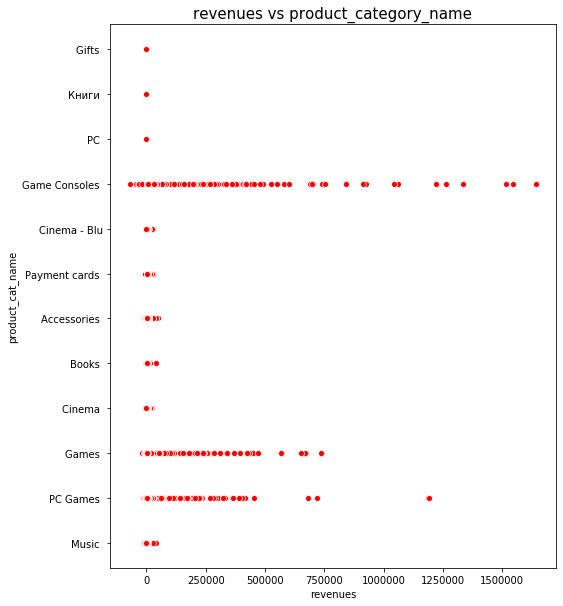

In [45]:
# sales of revenues by product_category_name
plt.figure(figsize = (8,10))
sns.scatterplot(x="revenues", y="product_cat_name", color='red', data=sales)
plt.title('revenues vs product_category_name', size=15,)

Text(0.5, 1.0, 'revenues vs shop_name')

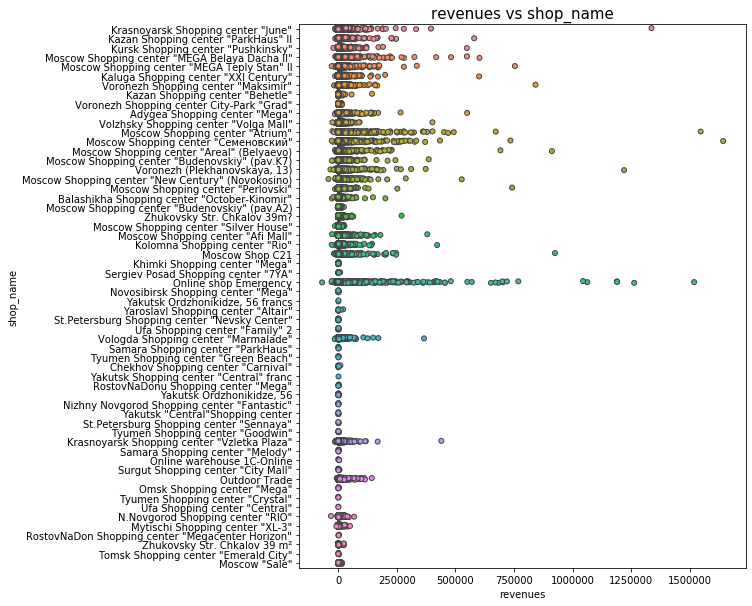

In [46]:
# sales of revenues by shop_name
plt.figure(figsize = (8,10))
sns.stripplot(x="revenues", y="shop_name", data=sales, jitter=True, linewidth=1)
plt.title('revenues vs shop_name', size=15,)

In [47]:
# sales varies by days of the week
plotsales = sales.groupby(['weekday'])['revenues'].sum()
plotsales = pd.DataFrame(plotsales)
plotsales.reset_index(inplace=True)

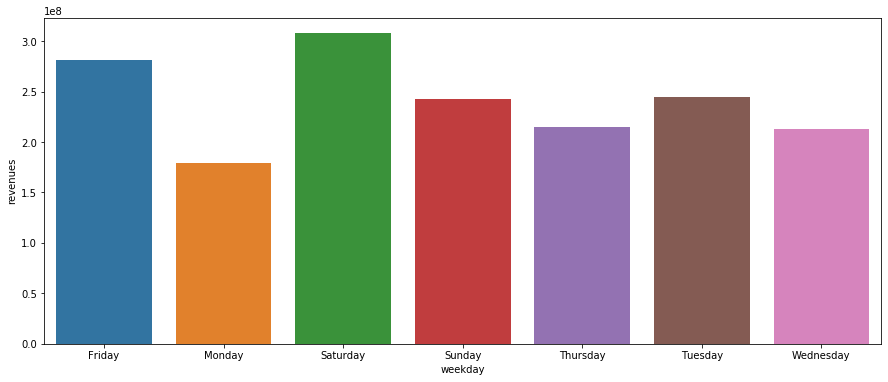

In [48]:
sns.barplot(x='weekday', y='revenues', data=plotsales)
#  Monday=0, Sunday=6

In [49]:
# chect the dataset for top 20 sales
topsales = sales.nlargest(columns='revenues', n=20) #Top 20 most sales
topsales

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name,revenues,city_name,product_cat_name,year,month,day,weekday,shop_item
550364,2013-11-29,10.0,31.0,"Moscow Shopping center ""Семеновский""",6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,18245.555556,90.0,12.0,Game Consoles - PS4,1.642100e+06,Moscow,Game Consoles,2013,11,29,Friday,31.0_6675
551562,2013-11-29,10.0,25.0,"Moscow Shopping center ""Atrium""",6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,18190.000000,85.0,12.0,Game Consoles - PS4,1.546150e+06,Moscow,Game Consoles,2013,11,29,Friday,25.0_6675
551297,2013-11-29,10.0,12.0,Online shop Emergency,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,18073.690476,84.0,12.0,Game Consoles - PS4,1.518190e+06,Online,Game Consoles,2013,11,29,Friday,12.0_6675
551607,2013-11-29,10.0,18.0,"Krasnoyarsk Shopping center ""June""",6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,18305.068493,73.0,12.0,Game Consoles - PS4,1.336270e+06,Krasnoyarsk,Game Consoles,2013,11,29,Friday,18.0_6675
584973,2013-12-19,11.0,12.0,Online shop Emergency,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,24278.461538,52.0,12.0,Game Consoles - PS4,1.262480e+06,Online,Game Consoles,2013,12,19,Thursday,12.0_6675
550093,2013-11-29,10.0,6.0,"Voronezh (Plekhanovskaya, 13)",6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,18198.955224,67.0,12.0,Game Consoles - PS4,1.219330e+06,Voronezh,Game Consoles,2013,11,29,Friday,6.0_6675
1252735,2015-05-19,28.0,12.0,Online shop Emergency,10212,"Witcher 3: Wild Hunt. Collector's Edition [PC,...",8499.000000,140.0,29.0,PC Games - Collector's Edition,1.189860e+06,Online,PC Games,2015,5,19,Tuesday,12.0_10212
1223421,2015-04-14,27.0,12.0,Online shop Emergency,3731,"Grand Theft Auto V [PC, Russian subtitles]",1904.548077,624.0,30.0,PC Games - Standard Edition,1.188438e+06,Online,PC Games,2015,4,14,Tuesday,12.0_3731
580729,2013-12-16,11.0,12.0,Online shop Emergency,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,18972.142857,56.0,12.0,Game Consoles - PS4,1.062440e+06,Online,Game Consoles,2013,12,16,Monday,12.0_6675
675543,2014-02-05,13.0,12.0,Online shop Emergency,6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,18990.000000,55.0,12.0,Game Consoles - PS4,1.044450e+06,Online,Game Consoles,2014,2,5,Wednesday,12.0_6675


In [50]:
# hightest revenue generating products
plotsales = sales.groupby(['item_id'])['revenues'].sum()
plotsales = pd.DataFrame(plotsales)
plotsales.reset_index(inplace=True)
plotsales.nlargest(20, 'revenues')   #.merge(item_name, how = 'left', on = 'item_id')

,item_id,revenues
4218,6675,1.277241e+08
2261,3732,2.597168e+07
9451,13443,1.884087e+07
2263,3734,1.752733e+07
2262,3733,1.323282e+07
11421,16787,1.289784e+07
2260,3731,1.217323e+07
3577,5823,1.071864e+07
1602,2808,1.043545e+07
6871,10210,1.039012e+07


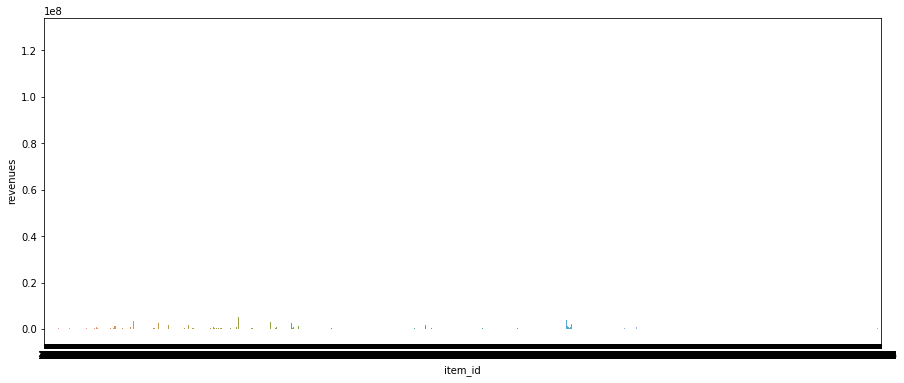

In [51]:
sns.barplot(x='item_id', y='revenues', data=plotsales)

In [52]:
# revenue genrated by each item_category_id
plotsales = sales.groupby(['item_category_id'])['revenues'].sum()
plotsales = pd.DataFrame(plotsales)
plotsales.reset_index(inplace=True)
plotsales.nlargest(6, 'revenues', keep='first')

,item_category_id,revenues
18,19.0,2.416386e+08
19,20.0,2.249808e+08
11,12.0,1.687336e+08
27,30.0,1.525338e+08
22,23.0,1.387360e+08
35,40.0,9.467265e+07


Text(0, 0.5, 'revenue')

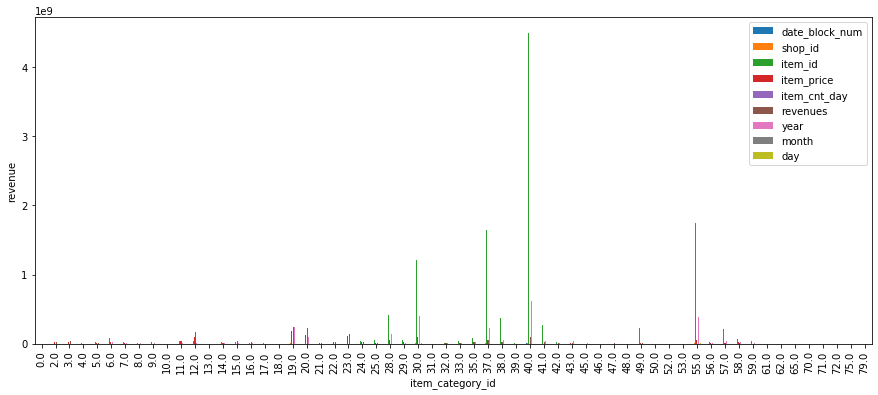

In [53]:
rep_plot = sales.groupby("item_category_id").sum().plot(kind='bar')
rep_plot.set_xlabel("item_category_id")
rep_plot.set_ylabel("revenue")

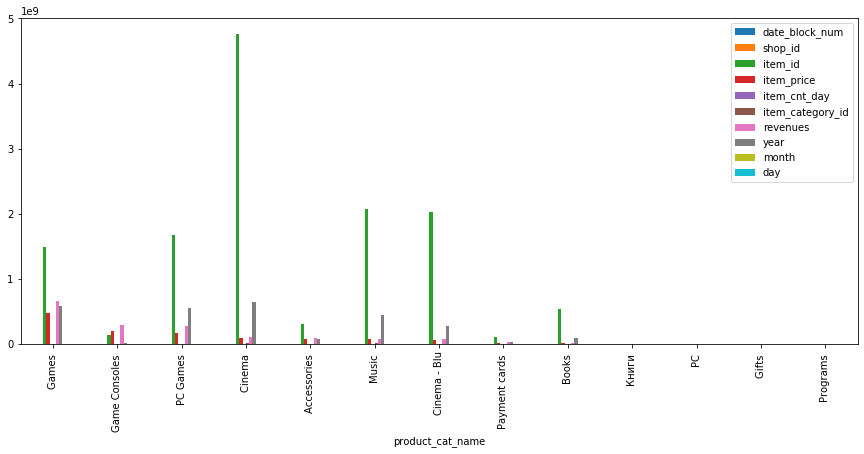

In [54]:
sales.groupby("product_cat_name").sum().sort_values("item_price", ascending=False).plot(kind='bar')

In [56]:
# what revenue does with each shop_id generate
plotsales = sales.groupby(['shop_id'])['revenues'].sum()
plotsales = pd.DataFrame(plotsales)
plotsales.reset_index(inplace=True)
plotsales.nlargest(5, 'revenues')

,shop_id,revenues
31,31.0,1.954485e+08
25,25.0,1.802569e+08
28,28.0,1.390521e+08
27,27.0,1.199458e+08
12,12.0,9.192048e+07


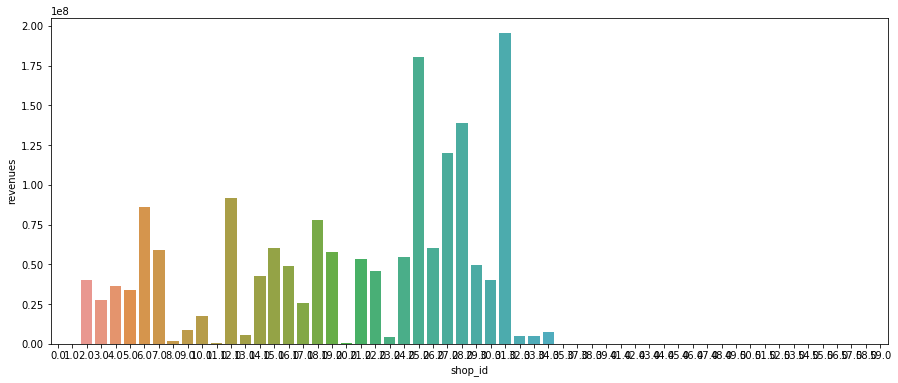

In [58]:
# plot for revenue by the shop_id
plotsales = sns.barplot(x='shop_id', y='revenues', data=plotsales)

In [65]:
# create a colume for plotting of the entire time series
sales['entire_ts'] = sales['date'].apply(lambda x: x.strftime('%y%m'))

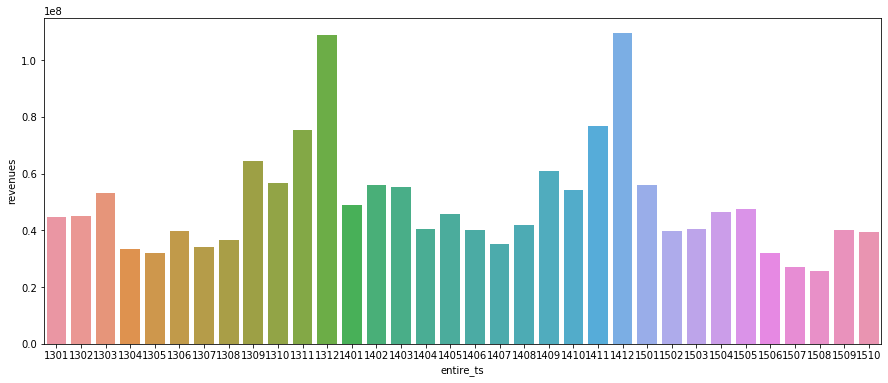

In [66]:
# the revenue trend over the entire timeseries
plotsales = sales.groupby('entire_ts')['revenues'].sum()
plotsales = pd.DataFrame(plotsales)
plotsales.reset_index(inplace=True)
sns.barplot(x="entire_ts", y="revenues", data= plotsales)